In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Conv1D, GlobalMaxPooling1D
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import TensorBoard
from time import time
tensorboard=TensorBoard(log_dir="log/{}".format(time()))

Using TensorFlow backend.


In [ ]:
train_data= pd.read_csv("train.tsv", sep="\t")
print(train_data.shape)
train_data.head
test_data = pd.read_csv("test.tsv", sep="\t")
print(train_data.shape)
train_data.head(5)

(156060, 4)
(156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
train_data = train_data.drop(columns=['PhraseId', 'SentenceId'])
test_data = test_data.drop(columns=['PhraseId', 'SentenceId'])

In [ ]:
label=train_data[['Sentiment']]

In [ ]:
train_data=train_data.drop(columns=['Sentiment'])

In [ ]:
train_data['Phrase'] = train_data['Phrase'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))
test_data['Phrase'] = test_data['Phrase'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))

In [ ]:
max_fatures =5000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(train_data['Phrase'].values)
X_train = tokenizer.texts_to_sequences(train_data['Phrase'].values)
X_train = pad_sequences(X_train)

In [ ]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(test_data['Phrase'].values)
X_test = tokenizer.texts_to_sequences(test_data['Phrase'].values)
X_test = pad_sequences(X_test)

In [ ]:
X_train.shape

(156060, 46)

In [ ]:
X_test.shape

(66292, 46)

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(label)
Y_train = to_categorical(integer_encoded)
X_tr, X_te, Y_tr, Y_te = train_test_split(X_train, Y_train, test_size=0.25, random_state=30)
print(X_tr.shape,Y_tr.shape)
print(X_te.shape,Y_te.shape)

(117045, 46) (117045, 5)
(39015, 46) (39015, 5)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
num_classes = Y_train.shape[1]
max_words= X_train.shape[1]
model= Sequential()
model.add(Embedding(5000,100,input_length=max_words))
model.add(Dropout(0.2))
model.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_tr, Y_tr, validation_data=(X_te, Y_te),epochs=5, batch_size=512, verbose=1, callbacks=[tensorboard])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 117045 samples, validate on 39015 samples
Epoch 1/5
117045/117045 [==============================] - 30s 258us/step - loss: 1.1544 - accuracy: 0.5523 - val_loss: 0.9635 - val_accuracy: 0.6153
Epoch 2/5
117045/117045 [==============================] - 30s 255us/step - loss: 0.9142 - accuracy: 0.6376 - val_loss: 0.9087 - val_accuracy: 0.6343
Epoch 3/5
117045/117045 [==============================] - 30s 255us/step - loss: 0.8516 - accuracy: 0.6610 - val_loss: 0.8757 - val_accuracy: 0.6460
Epoch 4/5
117045/117045 [==============================] - 30s 256us/step - loss: 0.8038 - accuracy: 0.6797 - val_loss: 0.8622 - val_accuracy: 0.6522
Epoch 5/5
117045/117045 [==============================] - 30s 254us/step - loss: 0.7678 - accuracy: 0.6943 - val_loss: 0.8601 - val_accuracy: 0.6537


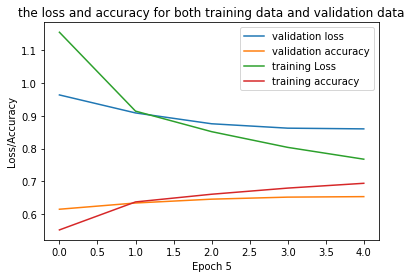

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.plot(history.history["loss"], label="training Loss")
plt.plot(history.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch 5")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [ ]:
model.predict_classes(X_te[:1])

array([2])

In [ ]:
Y_te[2]

array([0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_pred=model.predict_classes(X_test[:1])

In [ ]:
sub_file = pd.read_csv('sampleSubmission.csv',sep=',')
sub_file.iloc[0]

PhraseId     156061
Sentiment         2
Name: 0, dtype: int64

In [ ]:
print("PREDICTED LABEL ",y_pred[0])
print("ACTUAL LABEL  ",sub_file['Sentiment'].iloc[0])

PREDICTED LABEL  2
ACTUAL LABEL   2


In [ ]:
from keras.optimizers import adam
s=adam(lr=0.001)
model1= Sequential()
model1.add(Embedding(5000,100,input_length=max_words))
model1.add(Dropout(0.2))
model1.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes,activation='softmax'))
model1.compile(loss='binary_crossentropy',optimizer=s,metrics=['accuracy'])

In [ ]:
history1=model1.fit(X_tr, Y_tr, validation_data=(X_te, Y_te),epochs=5, batch_size=51, verbose=1, callbacks=[tensorboard])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 117045 samples, validate on 39015 samples
Epoch 1/5
117045/117045 [==============================] - 53s 457us/step - loss: 0.3443 - accuracy: 0.8483 - val_loss: 0.3145 - val_accuracy: 0.8581
Epoch 2/5
117045/117045 [==============================] - 54s 462us/step - loss: 0.3013 - accuracy: 0.8659 - val_loss: 0.3051 - val_accuracy: 0.8629
Epoch 3/5
117045/117045 [==============================] - 53s 457us/step - loss: 0.2843 - accuracy: 0.8744 - val_loss: 0.3033 - val_accuracy: 0.8631
Epoch 4/5
117045/117045 [==============================] - 54s 458us/step - loss: 0.2726 - accuracy: 0.8795 - val_loss: 0.3029 - val_accuracy: 0.8646
Epoch 5/5
117045/117045 [==============================] - 53s 457us/step - loss: 0.2632 - accuracy: 0.8847 - val_loss: 0.3050 - val_accuracy: 0.8639


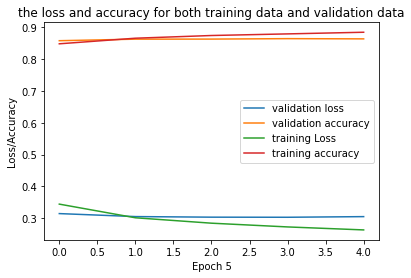

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history1.history["val_loss"], label="validation loss")
plt.plot(history1.history["val_accuracy"], label="validation accuracy")
plt.plot(history1.history["loss"], label="training Loss")
plt.plot(history1.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch 5")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")